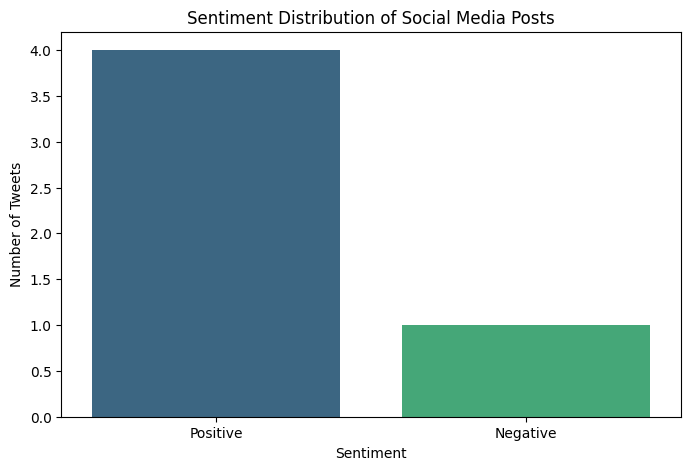

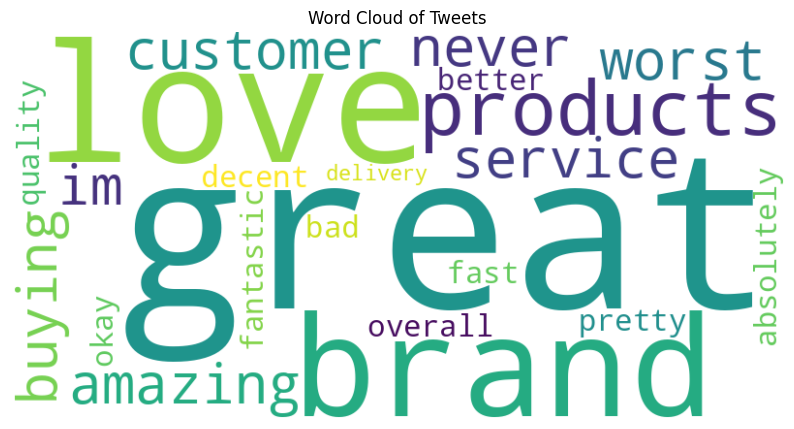

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

data = {
    "username": ["@user1", "@user2", "@user3", "@user4", "@user5"],
    "tweet": [
        "I love this brand! Their products are amazing! 😍",
        "Worst customer service ever. I'm never buying again. 😡",
        "Pretty decent overall. Could be better.",
        "This is just okay. Not bad, not great.",
        "Absolutely fantastic! Great quality and fast delivery."
    ]
}
df = pd.DataFrame(data)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip()
    return text

df['cleaned_tweet'] = df['tweet'].apply(clean_text)

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution of Social Media Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.savefig("sentiment_distribution.png")
plt.show()

from wordcloud import WordCloud

all_text = ' '.join(df['cleaned_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.savefig("wordcloud_tweets.png")
plt.show()

df.to_csv("sentiment_results.csv", index=False)

sentiment_counts = df['sentiment'].value_counts()
with open("sentiment_summary.txt", "w") as f:
    f.write("Sentiment Analysis Summary:\n")
    f.write(str(sentiment_counts))
